In [1]:
import numpy as np
import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

In [4]:
dataset = pd.read_csv('./social_network_ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(dataset.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Confusion Matrix: 
 [[53  5]
 [ 3 19]]
Accuracy: 0.9


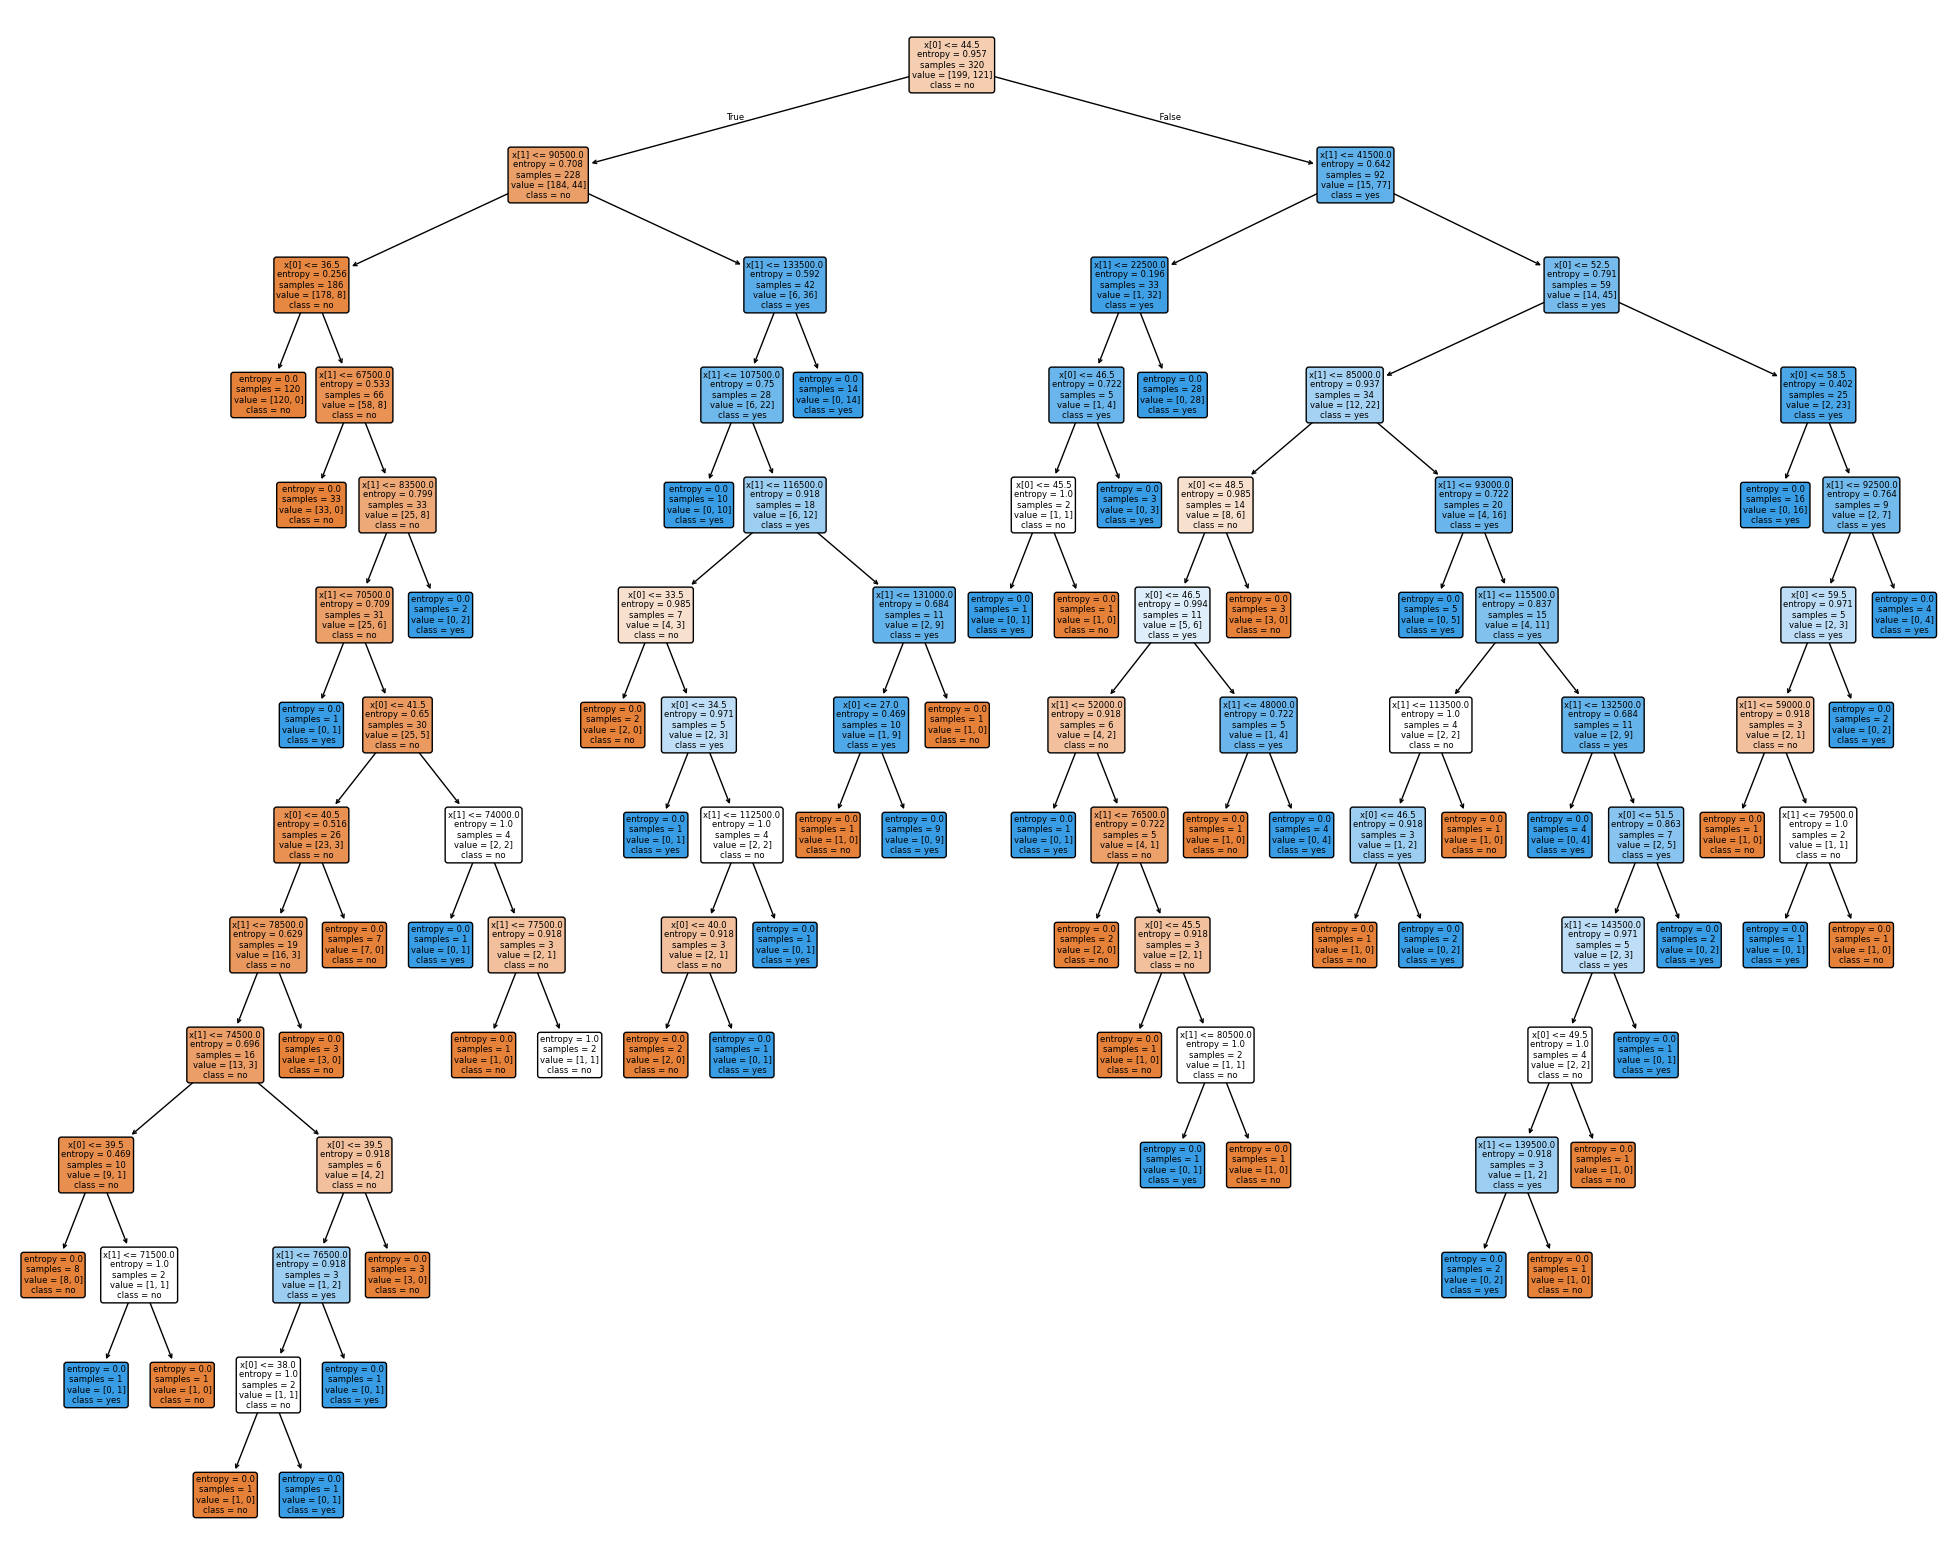

Prediction for new data: [0]


In [7]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)  # Use 'gini' for Gini impurity
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

#  Evaluate the model by making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n {cm}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(25, 20))
tree.plot_tree(classifier, class_names=['no', 'yes'], filled=True, rounded=True)
plt.show()

# Predicting a new result
new_data = [[30, 87000]]
prediction = classifier.predict(new_data)
print(f"Prediction for new data: {prediction}")

Training Accuracy: 0.996875
Test Accuracy: 0.9
Accuracy difference: 0.09687499999999993


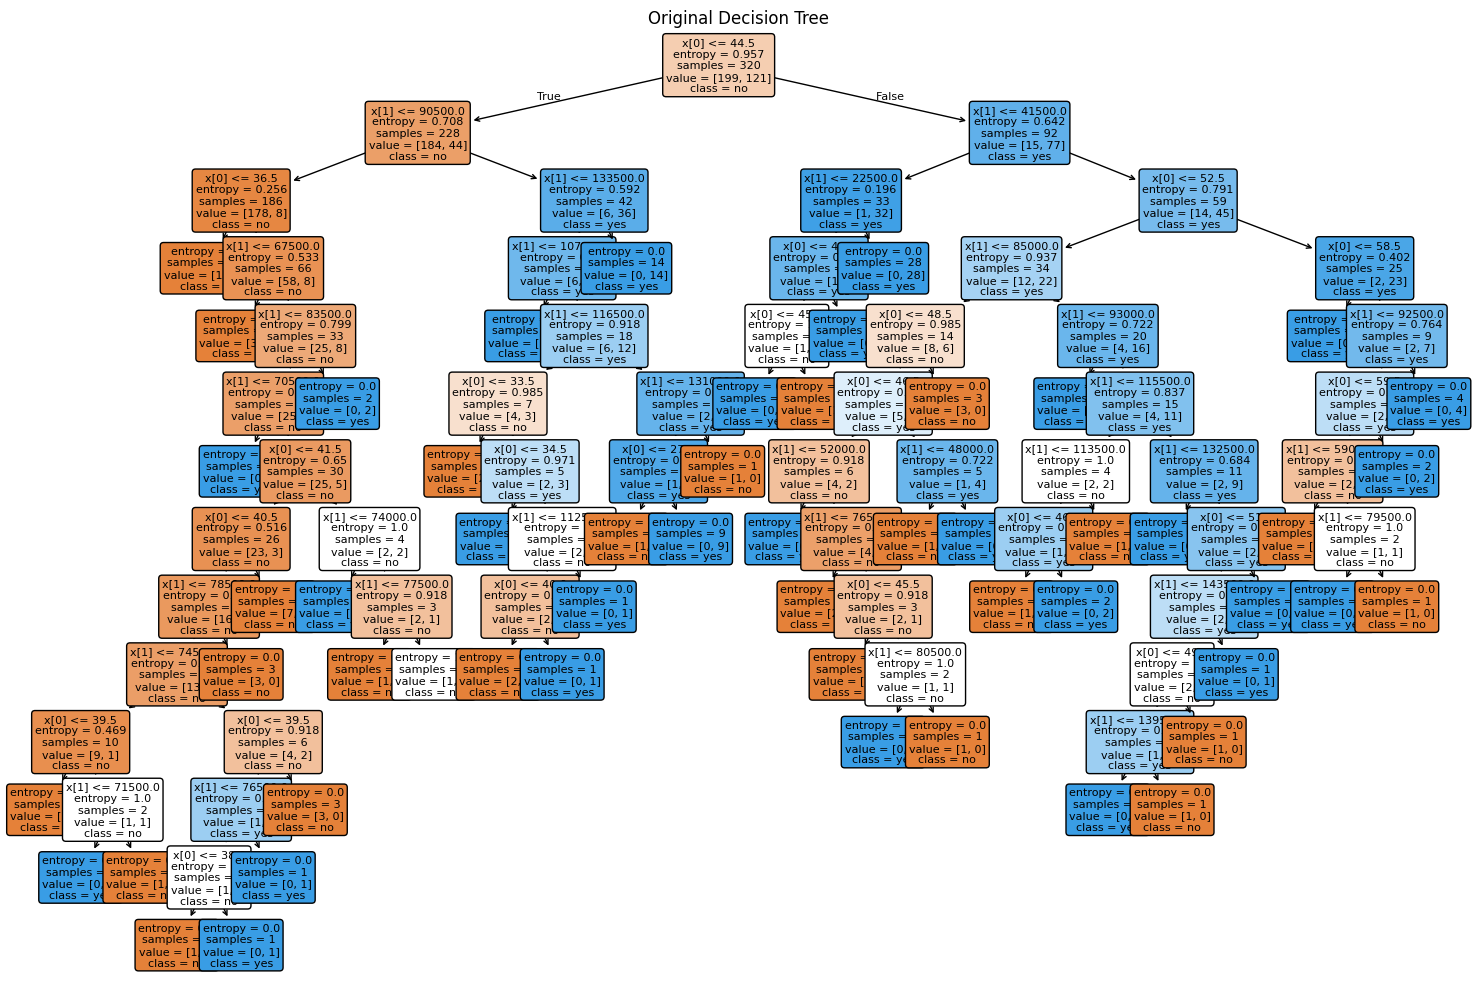


After pruning:
Training Accuracy: 0.909375
Test Accuracy: 0.95
Accuracy difference: -0.04062499999999991


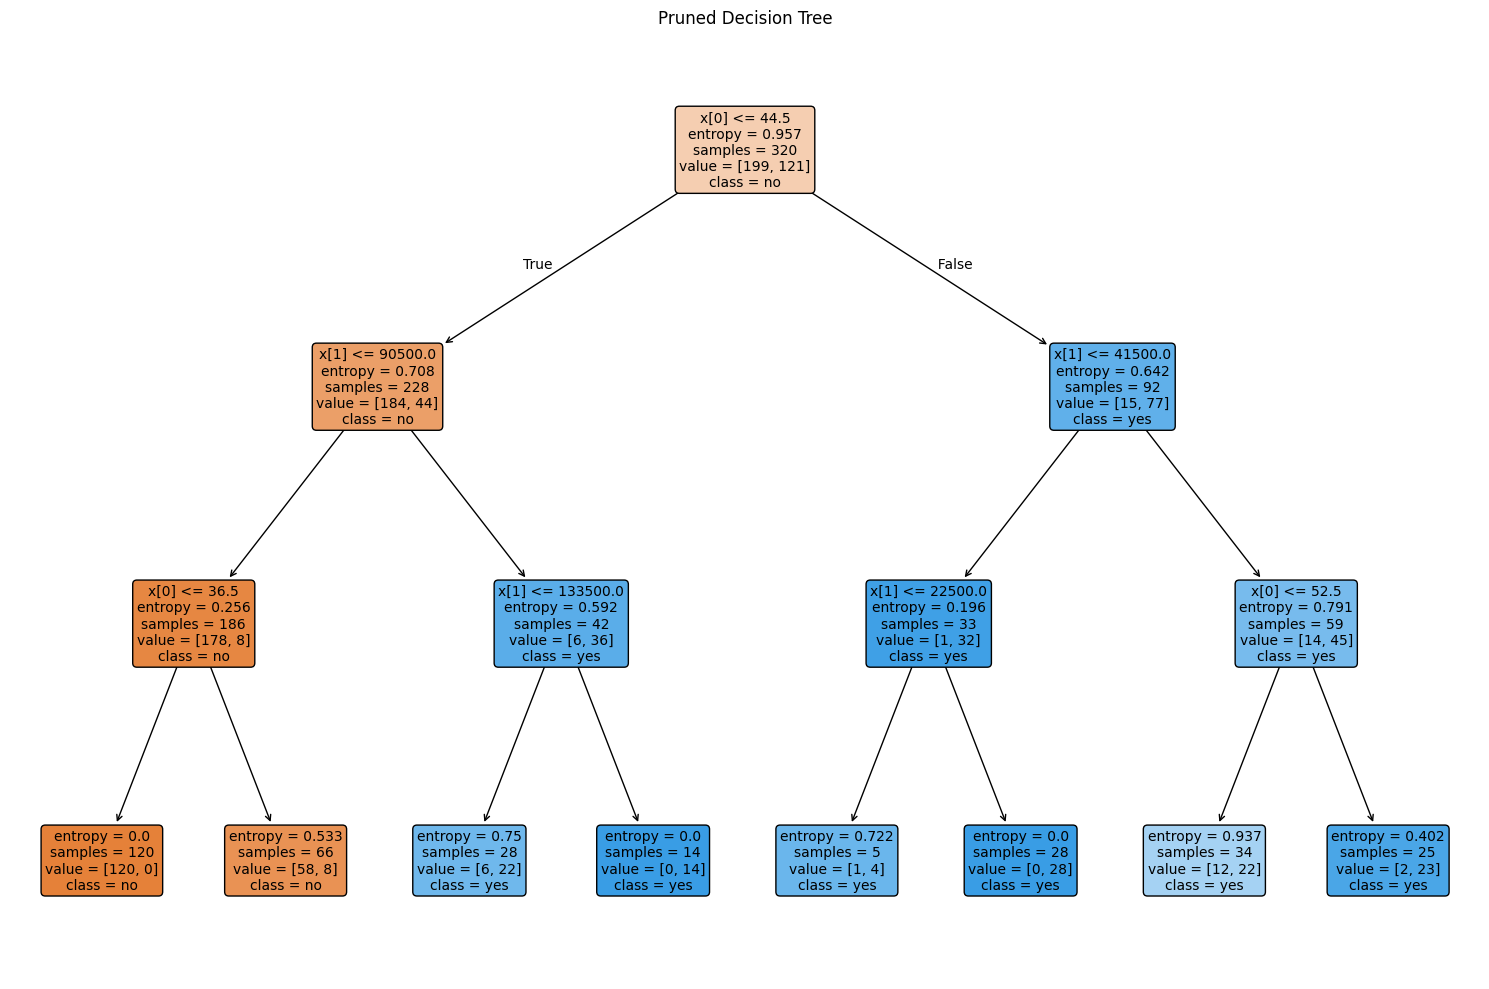

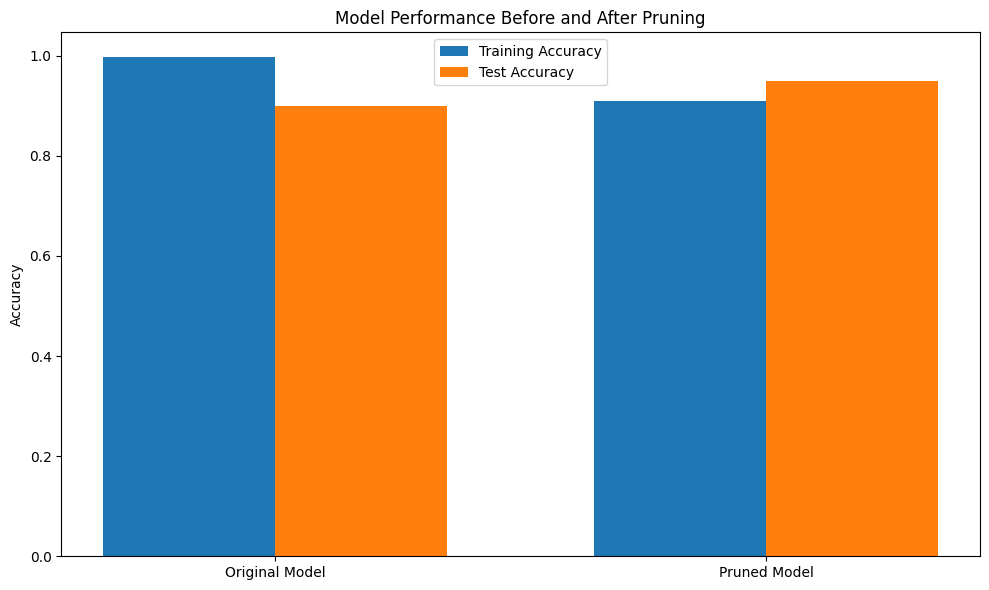

In [8]:
# Check for overfitting
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy  # Using the test accuracy you already calculated

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Accuracy difference: {train_accuracy - test_accuracy}")

# Visualize the original tree
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier, class_names=['no', 'yes'], filled=True, rounded=True, fontsize=8)
plt.title("Original Decision Tree")
plt.tight_layout()
plt.savefig('original_tree.png')
plt.show()

# Fix overfitting using pruning (limiting tree depth and min samples)
classifier_pruned = DecisionTreeClassifier(criterion='entropy',
                                          max_depth=3,  # Limit depth
                                          min_samples_split=10,  # Min samples to split
                                          min_samples_leaf=5,  # Min samples in leaf
                                          random_state=0)
classifier_pruned.fit(X_train, y_train)

# Evaluate pruned model
y_train_pred_pruned = classifier_pruned.predict(X_train)
y_test_pred_pruned = classifier_pruned.predict(X_test)

train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

print("\nAfter pruning:")
print(f"Training Accuracy: {train_accuracy_pruned}")
print(f"Test Accuracy: {test_accuracy_pruned}")
print(f"Accuracy difference: {train_accuracy_pruned - test_accuracy_pruned}")

# Visualize the pruned tree
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier_pruned, class_names=['no', 'yes'], filled=True, rounded=True, fontsize=10)
plt.title("Pruned Decision Tree")
plt.tight_layout()
plt.savefig('pruned_tree.png')
plt.show()

# Compare results with bar chart
labels = ['Original Model', 'Pruned Model']
train_accuracies = [train_accuracy, train_accuracy_pruned]
test_accuracies = [test_accuracy, test_accuracy_pruned]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Before and After Pruning')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.savefig('accuracy_comparison.png')
plt.show()